Tuned Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Logistic Regression Accuracy: 0.8464285714285713
Test Accuracy: 0.8333333333333334


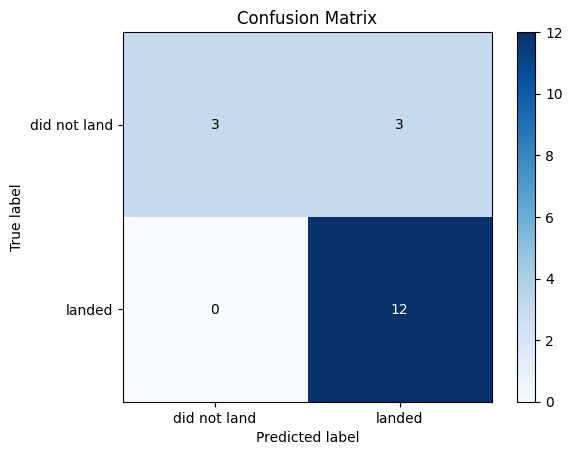


Tuned SVM Parameters: {'C': 1, 'kernel': 'rbf'}
Best SVM Accuracy: 0.8476190476190476
Test Accuracy: 0.7777777777777778


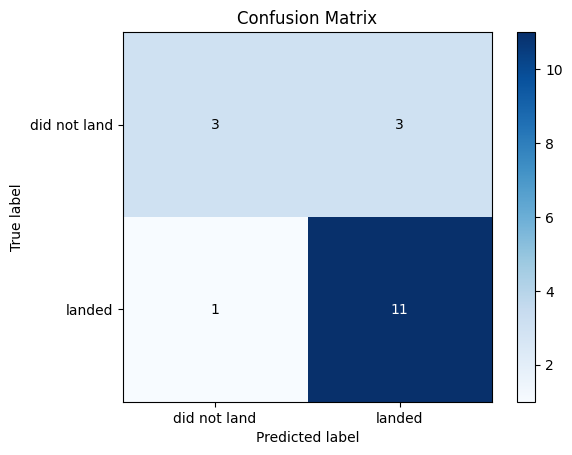


Tuned Decision Tree Parameters: {'max_depth': 2}
Best Decision Tree Accuracy: 0.819047619047619
Test Accuracy: 0.8333333333333334


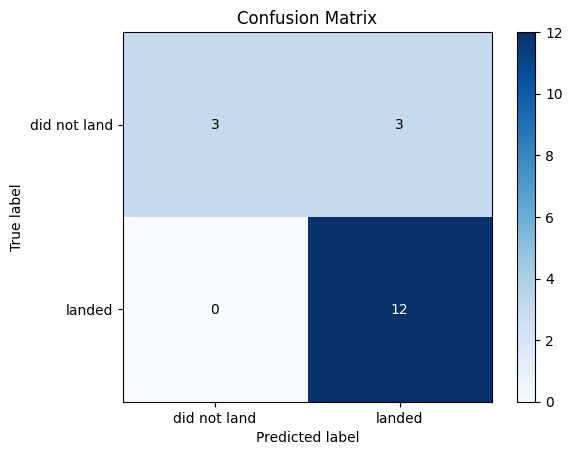


Tuned KNN Parameters: {'n_neighbors': 4}
Best KNN Accuracy: 0.818095238095238
Test Accuracy: 0.7777777777777778


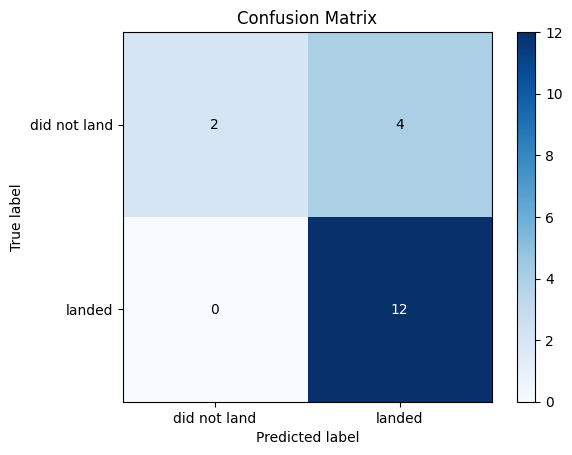


Best Performing Model: SVM with accuracy 0.8476


In [4]:
# Import available libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Custom confusion matrix plotting function (without seaborn)
def plot_confusion_matrix(y, y_predict):
    cm = confusion_matrix(y, y_predict)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    
    # Add labels
    ax.set(xticks=[0, 1],
           yticks=[0, 1],
           xticklabels=['did not land', 'landed'],
           yticklabels=['did not land', 'landed'],
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')

    # Add text annotations
    for i in range(2):
        for j in range(2):
            ax.text(j, i, str(cm[i, j]),
                    ha="center", va="center",
                    color="white" if cm[i, j] > cm.max()/2 else "black")
    plt.show()

# Load the data
from js import fetch
import io

# Load dataset_part_2.csv (labels)
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

# Load dataset_part_3.csv (features)
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

# TASK 1: Create NumPy array from Class column
Y = data['Class'].to_numpy()

# TASK 2: Standardize the data
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

# TASK 3: Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=2)

# TASK 4: Logistic Regression with GridSearchCV
lr_params = {"C": [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}
lr = LogisticRegression()
lr_cv = GridSearchCV(lr, lr_params, cv=10)
lr_cv.fit(X_train, Y_train)

print("Tuned Logistic Regression Parameters:", lr_cv.best_params_)
print("Best Logistic Regression Accuracy:", lr_cv.best_score_)

# TASK 5: Logistic Regression Evaluation
print("Test Accuracy:", lr_cv.score(X_test, Y_test))
lr_pred = lr_cv.predict(X_test)
plot_confusion_matrix(Y_test, lr_pred)

# TASK 6: SVM with GridSearchCV
svm_params = {'kernel': ['linear', 'rbf'],  # Simplified for this environment
              'C': [0.1, 1, 10]}
svm = SVC()
svm_cv = GridSearchCV(svm, svm_params, cv=5)  # Reduced cv for performance
svm_cv.fit(X_train, Y_train)

print("\nTuned SVM Parameters:", svm_cv.best_params_)
print("Best SVM Accuracy:", svm_cv.best_score_)

# TASK 7: SVM Evaluation
print("Test Accuracy:", svm_cv.score(X_test, Y_test))
svm_pred = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, svm_pred)

# TASK 8: Decision Tree with GridSearchCV
tree_params = {'max_depth': [2, 4, 6, 8, 10]}  # Simplified parameters
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, tree_params, cv=5)
tree_cv.fit(X_train, Y_train)

print("\nTuned Decision Tree Parameters:", tree_cv.best_params_)
print("Best Decision Tree Accuracy:", tree_cv.best_score_)

# TASK 9: Decision Tree Evaluation
print("Test Accuracy:", tree_cv.score(X_test, Y_test))
tree_pred = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, tree_pred)

# TASK 10: KNN with GridSearchCV
knn_params = {'n_neighbors': list(range(1, 6))}  # Reduced range
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=5)
knn_cv.fit(X_train, Y_train)

print("\nTuned KNN Parameters:", knn_cv.best_params_)
print("Best KNN Accuracy:", knn_cv.best_score_)

# TASK 11: KNN Evaluation
print("Test Accuracy:", knn_cv.score(X_test, Y_test))
knn_pred = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, knn_pred)

# TASK 12: Find the best performing method
results = {
    'Logistic Regression': lr_cv.best_score_,
    'SVM': svm_cv.best_score_,
    'Decision Tree': tree_cv.best_score_,
    'KNN': knn_cv.best_score_
}

best_model = max(results, key=results.get)
print(f"\nBest Performing Model: {best_model} with accuracy {results[best_model]:.4f}")